<span style="font-size: 32pt; color: blue; font-family: 'Times New Roman';">
    Conditional posterior probability densities
</span>
<br><br><br>

In [1]:
import xarray as xr
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

<h1 style="font-size: 32pt; color: blue; font-family: 'Times New Roman';">
    Load the file paths:
    <p style="font-size: 16pt; color: red; font-family: 'Times New Roman';"> 
        Use:: FACTS 1.0 data 
    </p>
</h1>

In [2]:
exp_date=221217
ssp='coupling.ssp585'
path_exp=f'/projects/kopp/facts-experiments/{exp_date}/{ssp}/output/'

# NYC ssp585 Total SL contribution for 2050.
data1=xr.open_dataset(path_exp+'coupling.ssp585.total.workflow.wf1f.local.nc')
data1

<xarray.Dataset>
Dimensions:           (samples: 2000, years: 14, locations: 1)
Coordinates:
  * years             (years) int64 2020 2030 2040 2050 ... 2120 2130 2140 2150
  * locations         (locations) int64 12
  * samples           (samples) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
Data variables:
    sea_level_change  (samples, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Total sea-level change for workflow
    history:      Created Sat Dec 17 09:39:03 2022
    source:       FACTS: Post-processed total among available contributors: /...

<h1 style="font-size: 22pt; color: blue; font-family: 'Times New Roman';">
    total slc for NYC in 2050 (m)
</h1>

In [11]:
slc2050=data1['sea_level_change'][:,np.where(data1['years'] == 2050)[0],0]/1000
slc2100=data1['sea_level_change'][:,np.where(data1['years'] == 2100)[0],0]/1000

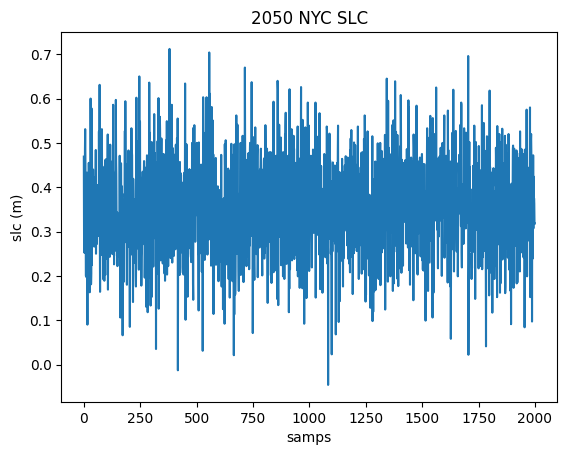

In [4]:
plt.plot(slc2050)
plt.xlabel('samps')
plt.ylabel('slc (m)')
plt.title('2050 NYC SLC')
plt.show()

<h1 style="font-size: 22pt; color: blue; font-family: 'Times New Roman';">
    Plot:: PDF
</h1>

In [14]:
slc2050_min, slc2050_max=np.min(slc2050), np.max(slc2050)
slc2100_min, slc2100_max=np.min(slc2100), np.max(slc2100)

In [15]:
def min_max(slc_min,slc_max):
    #adj to be the nearest lower and upper multiples of 50.
    slc_min = (slc_min // 0.50) * 0.50
    slc_max = -((-slc_max) // 0.50) * 0.50
    pden_X=np.linspace(slc_min,slc_max,10)
    return pden_X

pden_X_2050=min_max(slc2050_min,slc2050_max)
pden_X_2100=min_max(slc2100_min,slc2100_max)

<h1 style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
    :: Parametric Dist
</h1>

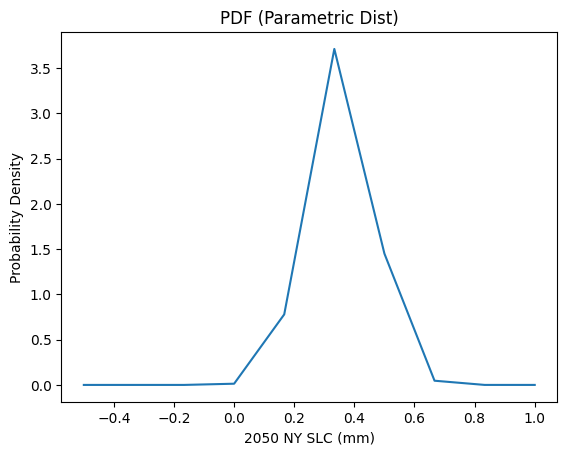

In [7]:
mu, std = np.mean(slc2050), np.std(slc2050)
pdf_values = norm.pdf(pden_X, mu, std)
plt.plot(pden_X, pdf_values)
plt.xlabel('2050 NY SLC (mm)')
plt.ylabel('Probability Density')
plt.title('PDF (Parametric Dist)')
plt.show()

<h1 style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
     :: Kernel Density Estimation
</h1>

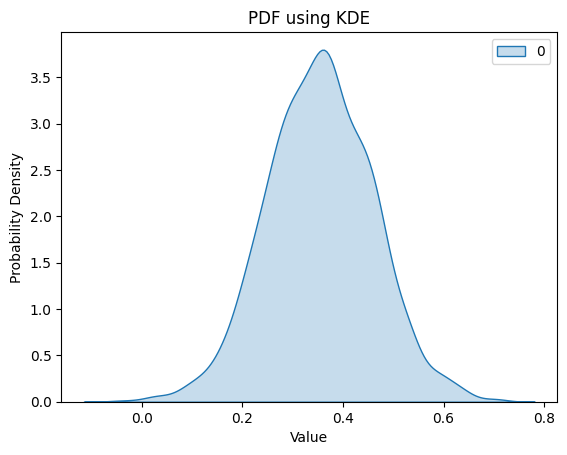

In [8]:
import seaborn as sns

sns.kdeplot(slc2050, fill=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF using KDE')
plt.show()


<h1 style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
     :: Histogram
</h1>

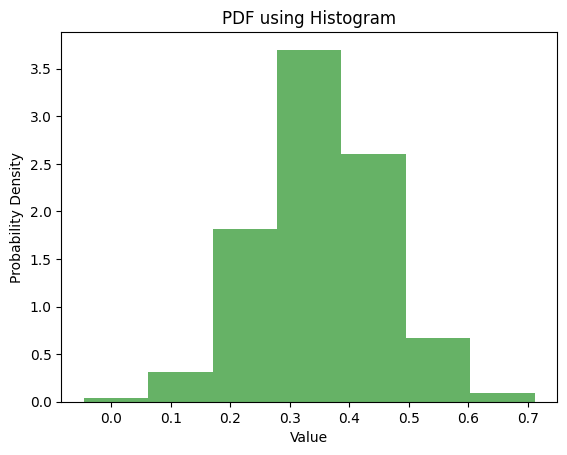

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#---
# Calculating number of bins based on desired bin size and range of data again
bin_width = 0.1  # 10 cm in meters
data_range = max(slc2050) - min(slc2050)
num_bins = int(data_range / bin_width)
#---
# plt.hist(slc2050, bins=300, density=True, alpha=0.6, color='g')
plt.hist(slc2050, bins=num_bins, density=True, alpha=0.6, color='g')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF using Histogram')
plt.show()